# 필요한 라이브러리 불러오기

In [5]:
import FinanceDataReader as fdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import exchange_calendars as ecals 
import datetime

XKRX = ecals.get_calendar("XKRX",side="left")

# 증권 4개년 뉴스 csv 불러오기

In [2]:
증권뉴스=pd.read_csv('./증권4개년 뉴스 전처리.csv')
증권뉴스

date                                 제목                 작성시간  \
0        2017-01-01                   인사 국민연금공단 기금운용본부  2017-01-01 22:53:00   
1        2017-01-01            국민연금 기금운용본부 운용전략실장에 이수철  2017-01-01 21:37:00   
2        2017-01-01            금리 오르면 사모펀드에 투자기회 늘어날 것  2017-01-01 19:45:00   
3        2017-01-01           마켓인사이트 KB증권 JW바이오 지분  인수  2017-01-01 19:41:00   
4        2017-01-01          증권사 이달부터 ELS 헤지자산 구분 관리해야  2017-01-01 19:39:00   
...             ...                                ...                  ...   
1461866  2020-12-31         한국항공우주 국방과학연구소와 억 규모 계약 체결  2020-12-31 13:37:00   
1461867  2020-12-31         사라지지 않은 코로나백신치료제 더 오른다 유망주  2020-12-31 13:34:00   
1461868  2020-12-31  동학개미 덕에 두 배 뛴 반도체슈퍼사이클로 더 간다  유망주  2020-12-31 13:34:00   
1461869  2020-12-31             채권 전문가  내년 채권 금리 보합 전망  2020-12-31 13:33:00   
1461870  2020-12-31                           인사KR투자증권  2020-12-31 13:29:00   

                                                       형태소  점수      date.1  
0               ['인사', '국민', '연금', '공단', '기금', '운용', '본부']   0  2017-01-01  
1        ['국민', '연금', '기금', '운용', '본부', '운용', '전략', '실장...   0  2017-01-01  
2        ['금리', '오르', '면', '사모', '펀드', '에', '투자', '기회',...   1  2017-01-01  
3        ['마켓', '인사이트', 'KB', '증권', 'JW', '바이오', '지분', ...   1  2017-01-01  
4        ['증권사', '이달', '부터', 'ELS', '헤지', '자산', '구분', '...   0  2017-01-01  
...                                                    ...  ..         ...  
1461866  ['한국', '항공우주', '국방과학연구소', '와', '억', '규모', '계약'...   1  2020-12-31  
1461867  ['사라지', '지', '않', '은', '코로나', '백신', '치료제', '더'...   1  2020-12-31  
1461868  ['동학', '개미', '덕', '에', '두', '배', '뛴', '반도체', '...   1  2020-12-31  
1461869        ['채권', '전문가', '내년', '채권', '금리', '보합', '전망']   0  2020-12-31  
1461870                           ['인사', 'KR', '투자', '증권']   0  2020-12-31  

[1461871 rows x 6 columns]

# 코스피 개장일, 감성어 점수, 감성어 change 데이터 전처리

In [3]:
# 코스피 개장일만 리스트에 담기
df = fdr.DataReader('KS11', '2017','2021')
kspi_list=df.index.strftime('%Y-%m-%d').tolist()
kspi_list

['2017-01-02',
 '2017-01-03',
 '2017-01-04',
 '2017-01-05',
 '2017-01-06',
 '2017-01-09',
 '2017-01-10',
 '2017-01-11',
 '2017-01-12',
 '2017-01-13',
 '2017-01-16',
 '2017-01-17',
 '2017-01-18',
 '2017-01-19',
 '2017-01-20',
 '2017-01-23',
 '2017-01-24',
 '2017-01-25',
 '2017-01-26',
 '2017-01-31',
 '2017-02-01',
 '2017-02-02',
 '2017-02-03',
 '2017-02-06',
 '2017-02-07',
 '2017-02-08',
 '2017-02-09',
 '2017-02-10',
 '2017-02-13',
 '2017-02-14',
 '2017-02-15',
 '2017-02-16',
 '2017-02-17',
 '2017-02-20',
 '2017-02-21',
 '2017-02-22',
 '2017-02-23',
 '2017-02-24',
 '2017-02-27',
 '2017-02-28',
 '2017-03-02',
 '2017-03-03',
 '2017-03-06',
 '2017-03-07',
 '2017-03-08',
 '2017-03-09',
 '2017-03-10',
 '2017-03-13',
 '2017-03-14',
 '2017-03-15',
 '2017-03-16',
 '2017-03-17',
 '2017-03-20',
 '2017-03-21',
 '2017-03-22',
 '2017-03-23',
 '2017-03-24',
 '2017-03-27',
 '2017-03-28',
 '2017-03-29',
 '2017-03-30',
 '2017-03-31',
 '2017-04-03',
 '2017-04-04',
 '2017-04-05',
 '2017-04-06',
 '2017-04-

In [4]:
df

Close     Open     High      Low        Volume  Change
Date                                                                
2017-01-02  2026.16  2022.23  2031.79  2015.68  2.298800e+08 -0.0001
2017-01-03  2043.97  2034.31  2044.07  2028.47  2.681300e+08  0.0088
2017-01-04  2045.64  2046.29  2046.29  2040.61  3.714900e+08  0.0008
2017-01-05  2041.95  2045.52  2046.50  2039.49  5.413400e+08 -0.0018
2017-01-06  2049.12  2048.11  2051.84  2045.66  4.553500e+08  0.0035
...             ...      ...      ...      ...           ...     ...
2020-12-23  2759.82  2737.74  2769.08  2716.28  1.120000e+09  0.0096
2020-12-24  2806.86  2762.60  2812.16  2762.60  1.030000e+09  0.0170
2020-12-28  2808.60  2820.95  2834.59  2799.56  1.010000e+09  0.0006
2020-12-29  2820.51  2810.55  2823.44  2792.06  1.050000e+09  0.0042
2020-12-30  2873.47  2820.36  2878.21  2809.35  1.070000e+09  0.0188

[981 rows x 6 columns]

In [5]:
df['감성어점수']=np.nan
# df.reindex(columns=df.columns.tolist()+['감성어점수'])

In [6]:
df['감성어_Change']=np.nan

In [7]:
df

Close     Open     High      Low        Volume  Change  감성어점수  \
Date                                                                          
2017-01-02  2026.16  2022.23  2031.79  2015.68  2.298800e+08 -0.0001    NaN   
2017-01-03  2043.97  2034.31  2044.07  2028.47  2.681300e+08  0.0088    NaN   
2017-01-04  2045.64  2046.29  2046.29  2040.61  3.714900e+08  0.0008    NaN   
2017-01-05  2041.95  2045.52  2046.50  2039.49  5.413400e+08 -0.0018    NaN   
2017-01-06  2049.12  2048.11  2051.84  2045.66  4.553500e+08  0.0035    NaN   
...             ...      ...      ...      ...           ...     ...    ...   
2020-12-23  2759.82  2737.74  2769.08  2716.28  1.120000e+09  0.0096    NaN   
2020-12-24  2806.86  2762.60  2812.16  2762.60  1.030000e+09  0.0170    NaN   
2020-12-28  2808.60  2820.95  2834.59  2799.56  1.010000e+09  0.0006    NaN   
2020-12-29  2820.51  2810.55  2823.44  2792.06  1.050000e+09  0.0042    NaN   
2020-12-30  2873.47  2820.36  2878.21  2809.35  1.070000e+09  0.0188    NaN   

            감성어_Change  
Date                    
2017-01-02         NaN  
2017-01-03         NaN  
2017-01-04         NaN  
2017-01-05         NaN  
2017-01-06         NaN  
...                ...  
2020-12-23         NaN  
2020-12-24         NaN  
2020-12-28         NaN  
2020-12-29         NaN  
2020-12-30         NaN  

[981 rows x 8 columns]

### 개장일에 해당하는 날짜의 뉴스기사마다 라벨링 되어 있는 감성점수(-1,0,1)의 총합을 감성어 점수칼럼에 입력

In [8]:
for i in range(len(kspi_list)):
    당일종가=kspi_list[i]+' 15:30:00'
    전일종가=XKRX.previous_open(kspi_list[i]).strftime('%Y-%m-%d %15:%31:00')
    감성어점수=sum(증권뉴스[(증권뉴스['작성시간']<당일종가)&(증권뉴스['작성시간']>전일종가)].점수)
    df.iloc[i,6]=감성어점수
    print(i,'번째를 실행했습니다.')
    

0 번째를 실행했습니다.
1 번째를 실행했습니다.
2 번째를 실행했습니다.
3 번째를 실행했습니다.
4 번째를 실행했습니다.
5 번째를 실행했습니다.
6 번째를 실행했습니다.
7 번째를 실행했습니다.
8 번째를 실행했습니다.
9 번째를 실행했습니다.
10 번째를 실행했습니다.
11 번째를 실행했습니다.
12 번째를 실행했습니다.
13 번째를 실행했습니다.
14 번째를 실행했습니다.
15 번째를 실행했습니다.
16 번째를 실행했습니다.
17 번째를 실행했습니다.
18 번째를 실행했습니다.
19 번째를 실행했습니다.
20 번째를 실행했습니다.
21 번째를 실행했습니다.
22 번째를 실행했습니다.
23 번째를 실행했습니다.
24 번째를 실행했습니다.
25 번째를 실행했습니다.
26 번째를 실행했습니다.
27 번째를 실행했습니다.
28 번째를 실행했습니다.
29 번째를 실행했습니다.
30 번째를 실행했습니다.
31 번째를 실행했습니다.
32 번째를 실행했습니다.
33 번째를 실행했습니다.
34 번째를 실행했습니다.
35 번째를 실행했습니다.
36 번째를 실행했습니다.
37 번째를 실행했습니다.
38 번째를 실행했습니다.
39 번째를 실행했습니다.
40 번째를 실행했습니다.
41 번째를 실행했습니다.
42 번째를 실행했습니다.
43 번째를 실행했습니다.
44 번째를 실행했습니다.
45 번째를 실행했습니다.
46 번째를 실행했습니다.
47 번째를 실행했습니다.
48 번째를 실행했습니다.
49 번째를 실행했습니다.
50 번째를 실행했습니다.
51 번째를 실행했습니다.
52 번째를 실행했습니다.
53 번째를 실행했습니다.
54 번째를 실행했습니다.
55 번째를 실행했습니다.
56 번째를 실행했습니다.
57 번째를 실행했습니다.
58 번째를 실행했습니다.
59 번째를 실행했습니다.
60 번째를 실행했습니다.
61 번째를 실행했습니다.
62 번째를 실행했습니다.
63 번째를 실행했습니다.
64 번째를 실행했습니다.
65 번째를 실행했습니다.
66 번째를 실행했습니다.
67 번째

519 번째를 실행했습니다.
520 번째를 실행했습니다.
521 번째를 실행했습니다.
522 번째를 실행했습니다.
523 번째를 실행했습니다.
524 번째를 실행했습니다.
525 번째를 실행했습니다.
526 번째를 실행했습니다.
527 번째를 실행했습니다.
528 번째를 실행했습니다.
529 번째를 실행했습니다.
530 번째를 실행했습니다.
531 번째를 실행했습니다.
532 번째를 실행했습니다.
533 번째를 실행했습니다.
534 번째를 실행했습니다.
535 번째를 실행했습니다.
536 번째를 실행했습니다.
537 번째를 실행했습니다.
538 번째를 실행했습니다.
539 번째를 실행했습니다.
540 번째를 실행했습니다.
541 번째를 실행했습니다.
542 번째를 실행했습니다.
543 번째를 실행했습니다.
544 번째를 실행했습니다.
545 번째를 실행했습니다.
546 번째를 실행했습니다.
547 번째를 실행했습니다.
548 번째를 실행했습니다.
549 번째를 실행했습니다.
550 번째를 실행했습니다.
551 번째를 실행했습니다.
552 번째를 실행했습니다.
553 번째를 실행했습니다.
554 번째를 실행했습니다.
555 번째를 실행했습니다.
556 번째를 실행했습니다.
557 번째를 실행했습니다.
558 번째를 실행했습니다.
559 번째를 실행했습니다.
560 번째를 실행했습니다.
561 번째를 실행했습니다.
562 번째를 실행했습니다.
563 번째를 실행했습니다.
564 번째를 실행했습니다.
565 번째를 실행했습니다.
566 번째를 실행했습니다.
567 번째를 실행했습니다.
568 번째를 실행했습니다.
569 번째를 실행했습니다.
570 번째를 실행했습니다.
571 번째를 실행했습니다.
572 번째를 실행했습니다.
573 번째를 실행했습니다.
574 번째를 실행했습니다.
575 번째를 실행했습니다.
576 번째를 실행했습니다.
577 번째를 실행했습니다.
578 번째를 실행했습니다.
579 번째를 실행했습니다.
580 번째를 실행했습니다.
581 번째를 

### 개장일에 해당하는 감성어 비율을 감성어_change 컬럼에 입력
### * 감성어 비율 = (당일 감성어점수- 전일 감성어 점수) / 전일 감성어 점수

In [10]:
for i in range(len(kspi_list)):
    감성어비율 = (df.iloc[i+1,6]-df.iloc[i,6])/df.iloc[i,6]
    df.iloc[i+1,7]=감성어비율
    
    print(i,'번째를 실행했습니다.')

0 번째를 실행했습니다.
1 번째를 실행했습니다.
2 번째를 실행했습니다.
3 번째를 실행했습니다.
4 번째를 실행했습니다.
5 번째를 실행했습니다.
6 번째를 실행했습니다.
7 번째를 실행했습니다.
8 번째를 실행했습니다.
9 번째를 실행했습니다.
10 번째를 실행했습니다.
11 번째를 실행했습니다.
12 번째를 실행했습니다.
13 번째를 실행했습니다.
14 번째를 실행했습니다.
15 번째를 실행했습니다.
16 번째를 실행했습니다.
17 번째를 실행했습니다.
18 번째를 실행했습니다.
19 번째를 실행했습니다.
20 번째를 실행했습니다.
21 번째를 실행했습니다.
22 번째를 실행했습니다.
23 번째를 실행했습니다.
24 번째를 실행했습니다.
25 번째를 실행했습니다.
26 번째를 실행했습니다.
27 번째를 실행했습니다.
28 번째를 실행했습니다.
29 번째를 실행했습니다.
30 번째를 실행했습니다.
31 번째를 실행했습니다.
32 번째를 실행했습니다.
33 번째를 실행했습니다.
34 번째를 실행했습니다.
35 번째를 실행했습니다.
36 번째를 실행했습니다.
37 번째를 실행했습니다.
38 번째를 실행했습니다.
39 번째를 실행했습니다.
40 번째를 실행했습니다.
41 번째를 실행했습니다.
42 번째를 실행했습니다.
43 번째를 실행했습니다.
44 번째를 실행했습니다.
45 번째를 실행했습니다.
46 번째를 실행했습니다.
47 번째를 실행했습니다.
48 번째를 실행했습니다.
49 번째를 실행했습니다.
50 번째를 실행했습니다.
51 번째를 실행했습니다.
52 번째를 실행했습니다.
53 번째를 실행했습니다.
54 번째를 실행했습니다.
55 번째를 실행했습니다.
56 번째를 실행했습니다.
57 번째를 실행했습니다.
58 번째를 실행했습니다.
59 번째를 실행했습니다.
60 번째를 실행했습니다.
61 번째를 실행했습니다.
62 번째를 실행했습니다.
63 번째를 실행했습니다.
64 번째를 실행했습니다.
65 번째를 실행했습니다.
66 번째를 실행했습니다.
67 번째

695 번째를 실행했습니다.
696 번째를 실행했습니다.
697 번째를 실행했습니다.
698 번째를 실행했습니다.
699 번째를 실행했습니다.
700 번째를 실행했습니다.
701 번째를 실행했습니다.
702 번째를 실행했습니다.
703 번째를 실행했습니다.
704 번째를 실행했습니다.
705 번째를 실행했습니다.
706 번째를 실행했습니다.
707 번째를 실행했습니다.
708 번째를 실행했습니다.
709 번째를 실행했습니다.
710 번째를 실행했습니다.
711 번째를 실행했습니다.
712 번째를 실행했습니다.
713 번째를 실행했습니다.
714 번째를 실행했습니다.
715 번째를 실행했습니다.
716 번째를 실행했습니다.
717 번째를 실행했습니다.
718 번째를 실행했습니다.
719 번째를 실행했습니다.
720 번째를 실행했습니다.
721 번째를 실행했습니다.
722 번째를 실행했습니다.
723 번째를 실행했습니다.
724 번째를 실행했습니다.
725 번째를 실행했습니다.
726 번째를 실행했습니다.
727 번째를 실행했습니다.
728 번째를 실행했습니다.
729 번째를 실행했습니다.
730 번째를 실행했습니다.
731 번째를 실행했습니다.
732 번째를 실행했습니다.
733 번째를 실행했습니다.
734 번째를 실행했습니다.
735 번째를 실행했습니다.
736 번째를 실행했습니다.
737 번째를 실행했습니다.
738 번째를 실행했습니다.
739 번째를 실행했습니다.
740 번째를 실행했습니다.
741 번째를 실행했습니다.
742 번째를 실행했습니다.
743 번째를 실행했습니다.
744 번째를 실행했습니다.
745 번째를 실행했습니다.
746 번째를 실행했습니다.
747 번째를 실행했습니다.
748 번째를 실행했습니다.
749 번째를 실행했습니다.
750 번째를 실행했습니다.
751 번째를 실행했습니다.
752 번째를 실행했습니다.
753 번째를 실행했습니다.
754 번째를 실행했습니다.
755 번째를 실행했습니다.
756 번째를 실행했습니다.
757 번째를 

IndexError: single positional indexer is out-of-bounds

### 감성어의 20일 비율을 감성어 20일 비율 컬럼에 담아냄
### *감성어 20일비율 = (20일 전 감성어 점수 - 당일 감성어 점수 )/ 당일 감성어 점수 

In [36]:
df['감성어20일_Change']=np.nan
df

Close     Open     High      Low        Volume  Change  감성어점수  \
Date                                                                          
2017-01-02  2026.16  2022.23  2031.79  2015.68  2.298800e+08 -0.0001  245.0   
2017-01-03  2043.97  2034.31  2044.07  2028.47  2.681300e+08  0.0088  372.0   
2017-01-04  2045.64  2046.29  2046.29  2040.61  3.714900e+08  0.0008  425.0   
2017-01-05  2041.95  2045.52  2046.50  2039.49  5.413400e+08 -0.0018  344.0   
2017-01-06  2049.12  2048.11  2051.84  2045.66  4.553500e+08  0.0035  344.0   
...             ...      ...      ...      ...           ...     ...    ...   
2020-12-23  2759.82  2737.74  2769.08  2716.28  1.120000e+09  0.0096  308.0   
2020-12-24  2806.86  2762.60  2812.16  2762.60  1.030000e+09  0.0170  360.0   
2020-12-28  2808.60  2820.95  2834.59  2799.56  1.010000e+09  0.0006  531.0   
2020-12-29  2820.51  2810.55  2823.44  2792.06  1.050000e+09  0.0042  316.0   
2020-12-30  2873.47  2820.36  2878.21  2809.35  1.070000e+09  0.0188  328.0   

            감성어_Change  감성어20일평균    감성어60일평균   감성어120일평균  감성어10일평균  감성어5일평균  \
Date                                                                          
2017-01-02         NaN       NaN         NaN         NaN       NaN      NaN   
2017-01-03    0.518367       NaN         NaN         NaN       NaN      NaN   
2017-01-04    0.142473       NaN         NaN         NaN       NaN      NaN   
2017-01-05   -0.190588       NaN         NaN         NaN       NaN      NaN   
2017-01-06    0.000000       NaN         NaN         NaN       NaN    277.2   
...                ...       ...         ...         ...       ...      ...   
2020-12-23    0.316239    327.75  296.066667  291.383333     290.6    229.0   
2020-12-24    0.168831    332.15  298.133333  289.450000     288.6    230.2   
2020-12-28    0.475000    336.30  298.183333  286.833333     291.3    247.8   
2020-12-29   -0.404896    339.65  300.700000  285.633333     302.8    286.6   
2020-12-30    0.037975    334.85  300.916667  282.791667     304.2    303.0   

              감성어30일평균  감성어20일_Change  
Date                                   
2017-01-02         NaN            NaN  
2017-01-03         NaN            NaN  
2017-01-04         NaN            NaN  
2017-01-05         NaN            NaN  
2017-01-06         NaN            NaN  
...                ...            ...  
2020-12-23  343.633333            NaN  
2020-12-24  343.900000            NaN  
2020-12-28  346.833333            NaN  
2020-12-29  347.600000            NaN  
2020-12-30  342.633333            NaN  

[981 rows x 15 columns]

In [37]:
for i in range(len(kspi_list)):
    감성어20일비율 = (df.iloc[i+19,6]-df.iloc[i,6])/df.iloc[i,6]
    df.iloc[i+19,14]=감성어20일비율
    
    print(i,'번째를 실행했습니다.')

0 번째를 실행했습니다.
1 번째를 실행했습니다.
2 번째를 실행했습니다.
3 번째를 실행했습니다.
4 번째를 실행했습니다.
5 번째를 실행했습니다.
6 번째를 실행했습니다.
7 번째를 실행했습니다.
8 번째를 실행했습니다.
9 번째를 실행했습니다.
10 번째를 실행했습니다.
11 번째를 실행했습니다.
12 번째를 실행했습니다.
13 번째를 실행했습니다.
14 번째를 실행했습니다.
15 번째를 실행했습니다.
16 번째를 실행했습니다.
17 번째를 실행했습니다.
18 번째를 실행했습니다.
19 번째를 실행했습니다.
20 번째를 실행했습니다.
21 번째를 실행했습니다.
22 번째를 실행했습니다.
23 번째를 실행했습니다.
24 번째를 실행했습니다.
25 번째를 실행했습니다.
26 번째를 실행했습니다.
27 번째를 실행했습니다.
28 번째를 실행했습니다.
29 번째를 실행했습니다.
30 번째를 실행했습니다.
31 번째를 실행했습니다.
32 번째를 실행했습니다.
33 번째를 실행했습니다.
34 번째를 실행했습니다.
35 번째를 실행했습니다.
36 번째를 실행했습니다.
37 번째를 실행했습니다.
38 번째를 실행했습니다.
39 번째를 실행했습니다.
40 번째를 실행했습니다.
41 번째를 실행했습니다.
42 번째를 실행했습니다.
43 번째를 실행했습니다.
44 번째를 실행했습니다.
45 번째를 실행했습니다.
46 번째를 실행했습니다.
47 번째를 실행했습니다.
48 번째를 실행했습니다.
49 번째를 실행했습니다.
50 번째를 실행했습니다.
51 번째를 실행했습니다.
52 번째를 실행했습니다.
53 번째를 실행했습니다.
54 번째를 실행했습니다.
55 번째를 실행했습니다.
56 번째를 실행했습니다.
57 번째를 실행했습니다.
58 번째를 실행했습니다.
59 번째를 실행했습니다.
60 번째를 실행했습니다.
61 번째를 실행했습니다.
62 번째를 실행했습니다.
63 번째를 실행했습니다.
64 번째를 실행했습니다.
65 번째를 실행했습니다.
66 번째를 실행했습니다.
67 번째

642 번째를 실행했습니다.
643 번째를 실행했습니다.
644 번째를 실행했습니다.
645 번째를 실행했습니다.
646 번째를 실행했습니다.
647 번째를 실행했습니다.
648 번째를 실행했습니다.
649 번째를 실행했습니다.
650 번째를 실행했습니다.
651 번째를 실행했습니다.
652 번째를 실행했습니다.
653 번째를 실행했습니다.
654 번째를 실행했습니다.
655 번째를 실행했습니다.
656 번째를 실행했습니다.
657 번째를 실행했습니다.
658 번째를 실행했습니다.
659 번째를 실행했습니다.
660 번째를 실행했습니다.
661 번째를 실행했습니다.
662 번째를 실행했습니다.
663 번째를 실행했습니다.
664 번째를 실행했습니다.
665 번째를 실행했습니다.
666 번째를 실행했습니다.
667 번째를 실행했습니다.
668 번째를 실행했습니다.
669 번째를 실행했습니다.
670 번째를 실행했습니다.
671 번째를 실행했습니다.
672 번째를 실행했습니다.
673 번째를 실행했습니다.
674 번째를 실행했습니다.
675 번째를 실행했습니다.
676 번째를 실행했습니다.
677 번째를 실행했습니다.
678 번째를 실행했습니다.
679 번째를 실행했습니다.
680 번째를 실행했습니다.
681 번째를 실행했습니다.
682 번째를 실행했습니다.
683 번째를 실행했습니다.
684 번째를 실행했습니다.
685 번째를 실행했습니다.
686 번째를 실행했습니다.
687 번째를 실행했습니다.
688 번째를 실행했습니다.
689 번째를 실행했습니다.
690 번째를 실행했습니다.
691 번째를 실행했습니다.
692 번째를 실행했습니다.
693 번째를 실행했습니다.
694 번째를 실행했습니다.
695 번째를 실행했습니다.
696 번째를 실행했습니다.
697 번째를 실행했습니다.
698 번째를 실행했습니다.
699 번째를 실행했습니다.
700 번째를 실행했습니다.
701 번째를 실행했습니다.
702 번째를 실행했습니다.
703 번째를 실행했습니다.
704 번째를 

IndexError: single positional indexer is out-of-bounds

In [12]:
df감성어변화율=df.copy()
df감성어변화율.dropna(inplace=True)

### 감성어20일을 평균내어 감성어 20일 평균 컬럼에 담아냄 

In [14]:
df['감성어20일평균']=np.nan

In [15]:
for i in range(len(kspi_list)):
    j=i-19
    if j>=0:
        감성어20일평균 = sum(df.iloc[j:i,6])/20
        df.iloc[i,8]=감성어20일평균
    else:
        pass
    
    print(i,'번째를 실행했습니다.')

0 번째를 실행했습니다.
1 번째를 실행했습니다.
2 번째를 실행했습니다.
3 번째를 실행했습니다.
4 번째를 실행했습니다.
5 번째를 실행했습니다.
6 번째를 실행했습니다.
7 번째를 실행했습니다.
8 번째를 실행했습니다.
9 번째를 실행했습니다.
10 번째를 실행했습니다.
11 번째를 실행했습니다.
12 번째를 실행했습니다.
13 번째를 실행했습니다.
14 번째를 실행했습니다.
15 번째를 실행했습니다.
16 번째를 실행했습니다.
17 번째를 실행했습니다.
18 번째를 실행했습니다.
19 번째를 실행했습니다.
20 번째를 실행했습니다.
21 번째를 실행했습니다.
22 번째를 실행했습니다.
23 번째를 실행했습니다.
24 번째를 실행했습니다.
25 번째를 실행했습니다.
26 번째를 실행했습니다.
27 번째를 실행했습니다.
28 번째를 실행했습니다.
29 번째를 실행했습니다.
30 번째를 실행했습니다.
31 번째를 실행했습니다.
32 번째를 실행했습니다.
33 번째를 실행했습니다.
34 번째를 실행했습니다.
35 번째를 실행했습니다.
36 번째를 실행했습니다.
37 번째를 실행했습니다.
38 번째를 실행했습니다.
39 번째를 실행했습니다.
40 번째를 실행했습니다.
41 번째를 실행했습니다.
42 번째를 실행했습니다.
43 번째를 실행했습니다.
44 번째를 실행했습니다.
45 번째를 실행했습니다.
46 번째를 실행했습니다.
47 번째를 실행했습니다.
48 번째를 실행했습니다.
49 번째를 실행했습니다.
50 번째를 실행했습니다.
51 번째를 실행했습니다.
52 번째를 실행했습니다.
53 번째를 실행했습니다.
54 번째를 실행했습니다.
55 번째를 실행했습니다.
56 번째를 실행했습니다.
57 번째를 실행했습니다.
58 번째를 실행했습니다.
59 번째를 실행했습니다.
60 번째를 실행했습니다.
61 번째를 실행했습니다.
62 번째를 실행했습니다.
63 번째를 실행했습니다.
64 번째를 실행했습니다.
65 번째를 실행했습니다.
66 번째를 실행했습니다.
67 번째

612 번째를 실행했습니다.
613 번째를 실행했습니다.
614 번째를 실행했습니다.
615 번째를 실행했습니다.
616 번째를 실행했습니다.
617 번째를 실행했습니다.
618 번째를 실행했습니다.
619 번째를 실행했습니다.
620 번째를 실행했습니다.
621 번째를 실행했습니다.
622 번째를 실행했습니다.
623 번째를 실행했습니다.
624 번째를 실행했습니다.
625 번째를 실행했습니다.
626 번째를 실행했습니다.
627 번째를 실행했습니다.
628 번째를 실행했습니다.
629 번째를 실행했습니다.
630 번째를 실행했습니다.
631 번째를 실행했습니다.
632 번째를 실행했습니다.
633 번째를 실행했습니다.
634 번째를 실행했습니다.
635 번째를 실행했습니다.
636 번째를 실행했습니다.
637 번째를 실행했습니다.
638 번째를 실행했습니다.
639 번째를 실행했습니다.
640 번째를 실행했습니다.
641 번째를 실행했습니다.
642 번째를 실행했습니다.
643 번째를 실행했습니다.
644 번째를 실행했습니다.
645 번째를 실행했습니다.
646 번째를 실행했습니다.
647 번째를 실행했습니다.
648 번째를 실행했습니다.
649 번째를 실행했습니다.
650 번째를 실행했습니다.
651 번째를 실행했습니다.
652 번째를 실행했습니다.
653 번째를 실행했습니다.
654 번째를 실행했습니다.
655 번째를 실행했습니다.
656 번째를 실행했습니다.
657 번째를 실행했습니다.
658 번째를 실행했습니다.
659 번째를 실행했습니다.
660 번째를 실행했습니다.
661 번째를 실행했습니다.
662 번째를 실행했습니다.
663 번째를 실행했습니다.
664 번째를 실행했습니다.
665 번째를 실행했습니다.
666 번째를 실행했습니다.
667 번째를 실행했습니다.
668 번째를 실행했습니다.
669 번째를 실행했습니다.
670 번째를 실행했습니다.
671 번째를 실행했습니다.
672 번째를 실행했습니다.
673 번째를 실행했습니다.
674 번째를 

In [16]:
df20=df.copy()
df20.dropna(inplace=True)
df20.corr()

Close      Open      High       Low    Volume    Change  \
Close       1.000000  0.995597  0.997682  0.998383 -0.014688  0.081866   
Open        0.995597  1.000000  0.998512  0.997590 -0.013687  0.011139   
High        0.997682  0.998512  1.000000  0.997338  0.000410  0.034849   
Low         0.998383  0.997590  0.997338  1.000000 -0.030745  0.051858   
Volume     -0.014688 -0.013687  0.000410 -0.030745  1.000000  0.025141   
Change      0.081866  0.011139  0.034849  0.051858  0.025141  1.000000   
감성어점수       0.160939  0.148117  0.147420  0.163262 -0.090529  0.364496   
감성어_Change  0.022853  0.017918  0.018766  0.021326  0.005631  0.078897   
감성어20일평균    0.285780  0.288549  0.282726  0.292494 -0.148660 -0.021953   

               감성어점수  감성어_Change  감성어20일평균  
Close       0.160939    0.022853  0.285780  
Open        0.148117    0.017918  0.288549  
High        0.147420    0.018766  0.282726  
Low         0.163262    0.021326  0.292494  
Volume     -0.090529    0.005631 -0.148660  
Change      0.364496    0.078897 -0.021953  
감성어점수       1.000000    0.122860  0.439683  
감성어_Change  0.122860    1.000000  0.000924  
감성어20일평균    0.439683    0.000924  1.000000

In [17]:
df20.to_csv('./20일평균포함.csv')

### 감성어의 60일 평균을 감성어 60일 평균 컬럼에 담아냄

In [18]:
df['감성어60일평균']=np.nan

In [19]:
for i in range(len(kspi_list)):
    j=i-59
    if j>=0:
        감성어60일평균 = sum(df.iloc[j:i,6])/60
        df.iloc[i,9]=감성어60일평균
    else:
        pass
    
    print(i,'번째를 실행했습니다.')

0 번째를 실행했습니다.
1 번째를 실행했습니다.
2 번째를 실행했습니다.
3 번째를 실행했습니다.
4 번째를 실행했습니다.
5 번째를 실행했습니다.
6 번째를 실행했습니다.
7 번째를 실행했습니다.
8 번째를 실행했습니다.
9 번째를 실행했습니다.
10 번째를 실행했습니다.
11 번째를 실행했습니다.
12 번째를 실행했습니다.
13 번째를 실행했습니다.
14 번째를 실행했습니다.
15 번째를 실행했습니다.
16 번째를 실행했습니다.
17 번째를 실행했습니다.
18 번째를 실행했습니다.
19 번째를 실행했습니다.
20 번째를 실행했습니다.
21 번째를 실행했습니다.
22 번째를 실행했습니다.
23 번째를 실행했습니다.
24 번째를 실행했습니다.
25 번째를 실행했습니다.
26 번째를 실행했습니다.
27 번째를 실행했습니다.
28 번째를 실행했습니다.
29 번째를 실행했습니다.
30 번째를 실행했습니다.
31 번째를 실행했습니다.
32 번째를 실행했습니다.
33 번째를 실행했습니다.
34 번째를 실행했습니다.
35 번째를 실행했습니다.
36 번째를 실행했습니다.
37 번째를 실행했습니다.
38 번째를 실행했습니다.
39 번째를 실행했습니다.
40 번째를 실행했습니다.
41 번째를 실행했습니다.
42 번째를 실행했습니다.
43 번째를 실행했습니다.
44 번째를 실행했습니다.
45 번째를 실행했습니다.
46 번째를 실행했습니다.
47 번째를 실행했습니다.
48 번째를 실행했습니다.
49 번째를 실행했습니다.
50 번째를 실행했습니다.
51 번째를 실행했습니다.
52 번째를 실행했습니다.
53 번째를 실행했습니다.
54 번째를 실행했습니다.
55 번째를 실행했습니다.
56 번째를 실행했습니다.
57 번째를 실행했습니다.
58 번째를 실행했습니다.
59 번째를 실행했습니다.
60 번째를 실행했습니다.
61 번째를 실행했습니다.
62 번째를 실행했습니다.
63 번째를 실행했습니다.
64 번째를 실행했습니다.
65 번째를 실행했습니다.
66 번째를 실행했습니다.
67 번째

624 번째를 실행했습니다.
625 번째를 실행했습니다.
626 번째를 실행했습니다.
627 번째를 실행했습니다.
628 번째를 실행했습니다.
629 번째를 실행했습니다.
630 번째를 실행했습니다.
631 번째를 실행했습니다.
632 번째를 실행했습니다.
633 번째를 실행했습니다.
634 번째를 실행했습니다.
635 번째를 실행했습니다.
636 번째를 실행했습니다.
637 번째를 실행했습니다.
638 번째를 실행했습니다.
639 번째를 실행했습니다.
640 번째를 실행했습니다.
641 번째를 실행했습니다.
642 번째를 실행했습니다.
643 번째를 실행했습니다.
644 번째를 실행했습니다.
645 번째를 실행했습니다.
646 번째를 실행했습니다.
647 번째를 실행했습니다.
648 번째를 실행했습니다.
649 번째를 실행했습니다.
650 번째를 실행했습니다.
651 번째를 실행했습니다.
652 번째를 실행했습니다.
653 번째를 실행했습니다.
654 번째를 실행했습니다.
655 번째를 실행했습니다.
656 번째를 실행했습니다.
657 번째를 실행했습니다.
658 번째를 실행했습니다.
659 번째를 실행했습니다.
660 번째를 실행했습니다.
661 번째를 실행했습니다.
662 번째를 실행했습니다.
663 번째를 실행했습니다.
664 번째를 실행했습니다.
665 번째를 실행했습니다.
666 번째를 실행했습니다.
667 번째를 실행했습니다.
668 번째를 실행했습니다.
669 번째를 실행했습니다.
670 번째를 실행했습니다.
671 번째를 실행했습니다.
672 번째를 실행했습니다.
673 번째를 실행했습니다.
674 번째를 실행했습니다.
675 번째를 실행했습니다.
676 번째를 실행했습니다.
677 번째를 실행했습니다.
678 번째를 실행했습니다.
679 번째를 실행했습니다.
680 번째를 실행했습니다.
681 번째를 실행했습니다.
682 번째를 실행했습니다.
683 번째를 실행했습니다.
684 번째를 실행했습니다.
685 번째를 실행했습니다.
686 번째를 

In [20]:
df

Close     Open     High      Low        Volume  Change  감성어점수  \
Date                                                                          
2017-01-02  2026.16  2022.23  2031.79  2015.68  2.298800e+08 -0.0001  245.0   
2017-01-03  2043.97  2034.31  2044.07  2028.47  2.681300e+08  0.0088  372.0   
2017-01-04  2045.64  2046.29  2046.29  2040.61  3.714900e+08  0.0008  425.0   
2017-01-05  2041.95  2045.52  2046.50  2039.49  5.413400e+08 -0.0018  344.0   
2017-01-06  2049.12  2048.11  2051.84  2045.66  4.553500e+08  0.0035  344.0   
...             ...      ...      ...      ...           ...     ...    ...   
2020-12-23  2759.82  2737.74  2769.08  2716.28  1.120000e+09  0.0096  308.0   
2020-12-24  2806.86  2762.60  2812.16  2762.60  1.030000e+09  0.0170  360.0   
2020-12-28  2808.60  2820.95  2834.59  2799.56  1.010000e+09  0.0006  531.0   
2020-12-29  2820.51  2810.55  2823.44  2792.06  1.050000e+09  0.0042  316.0   
2020-12-30  2873.47  2820.36  2878.21  2809.35  1.070000e+09  0.0188  328.0   

            감성어_Change  감성어20일평균    감성어60일평균  
Date                                          
2017-01-02         NaN       NaN         NaN  
2017-01-03    0.518367       NaN         NaN  
2017-01-04    0.142473       NaN         NaN  
2017-01-05   -0.190588       NaN         NaN  
2017-01-06    0.000000       NaN         NaN  
...                ...       ...         ...  
2020-12-23    0.316239    327.75  296.066667  
2020-12-24    0.168831    332.15  298.133333  
2020-12-28    0.475000    336.30  298.183333  
2020-12-29   -0.404896    339.65  300.700000  
2020-12-30    0.037975    334.85  300.916667  

[981 rows x 10 columns]

In [21]:
df60=df.copy()
df60.dropna(inplace=True)
df60.corr()

Close      Open      High       Low    Volume    Change  \
Close       1.000000  0.995533  0.997665  0.998381 -0.033177  0.083762   
Open        0.995533  1.000000  0.998511  0.997583 -0.032467  0.012520   
High        0.997665  0.998511  1.000000  0.997381 -0.018828  0.036350   
Low         0.998381  0.997583  0.997381  1.000000 -0.048792  0.053452   
Volume     -0.033177 -0.032467 -0.018828 -0.048792  1.000000  0.027642   
Change      0.083762  0.012520  0.036350  0.053452  0.027642  1.000000   
감성어점수       0.156389  0.143384  0.142391  0.158972 -0.099204  0.365684   
감성어_Change  0.023932  0.019100  0.019898  0.022426  0.006167  0.077760   
감성어20일평균    0.279537  0.282212  0.276113  0.286632 -0.161958 -0.020627   
감성어60일평균    0.234436  0.241407  0.234761  0.242478 -0.323547 -0.063269   

               감성어점수  감성어_Change  감성어20일평균  감성어60일평균  
Close       0.156389    0.023932  0.279537  0.234436  
Open        0.143384    0.019100  0.282212  0.241407  
High        0.142391    0.019898  0.276113  0.234761  
Low         0.158972    0.022426  0.286632  0.242478  
Volume     -0.099204    0.006167 -0.161958 -0.323547  
Change      0.365684    0.077760 -0.020627 -0.063269  
감성어점수       1.000000    0.124403  0.440483  0.264266  
감성어_Change  0.124403    1.000000  0.001409 -0.010854  
감성어20일평균    0.440483    0.001409  1.000000  0.684518  
감성어60일평균    0.264266   -0.010854  0.684518  1.000000

In [22]:
df60.to_csv('./60일평균포함.csv')

### 감성어의 120일 평균을 감성어 120일 평균 컬럼에 담아냄

In [23]:
df['감성어120일평균']=np.nan

In [24]:
for i in range(len(kspi_list)):
    j=i-119
    if j>=0:
        감성어120일평균 = sum(df.iloc[j:i,6])/120
        df.iloc[i,10]=감성어120일평균
    else:
        pass
    
    print(i,'번째를 실행했습니다.')

0 번째를 실행했습니다.
1 번째를 실행했습니다.
2 번째를 실행했습니다.
3 번째를 실행했습니다.
4 번째를 실행했습니다.
5 번째를 실행했습니다.
6 번째를 실행했습니다.
7 번째를 실행했습니다.
8 번째를 실행했습니다.
9 번째를 실행했습니다.
10 번째를 실행했습니다.
11 번째를 실행했습니다.
12 번째를 실행했습니다.
13 번째를 실행했습니다.
14 번째를 실행했습니다.
15 번째를 실행했습니다.
16 번째를 실행했습니다.
17 번째를 실행했습니다.
18 번째를 실행했습니다.
19 번째를 실행했습니다.
20 번째를 실행했습니다.
21 번째를 실행했습니다.
22 번째를 실행했습니다.
23 번째를 실행했습니다.
24 번째를 실행했습니다.
25 번째를 실행했습니다.
26 번째를 실행했습니다.
27 번째를 실행했습니다.
28 번째를 실행했습니다.
29 번째를 실행했습니다.
30 번째를 실행했습니다.
31 번째를 실행했습니다.
32 번째를 실행했습니다.
33 번째를 실행했습니다.
34 번째를 실행했습니다.
35 번째를 실행했습니다.
36 번째를 실행했습니다.
37 번째를 실행했습니다.
38 번째를 실행했습니다.
39 번째를 실행했습니다.
40 번째를 실행했습니다.
41 번째를 실행했습니다.
42 번째를 실행했습니다.
43 번째를 실행했습니다.
44 번째를 실행했습니다.
45 번째를 실행했습니다.
46 번째를 실행했습니다.
47 번째를 실행했습니다.
48 번째를 실행했습니다.
49 번째를 실행했습니다.
50 번째를 실행했습니다.
51 번째를 실행했습니다.
52 번째를 실행했습니다.
53 번째를 실행했습니다.
54 번째를 실행했습니다.
55 번째를 실행했습니다.
56 번째를 실행했습니다.
57 번째를 실행했습니다.
58 번째를 실행했습니다.
59 번째를 실행했습니다.
60 번째를 실행했습니다.
61 번째를 실행했습니다.
62 번째를 실행했습니다.
63 번째를 실행했습니다.
64 번째를 실행했습니다.
65 번째를 실행했습니다.
66 번째를 실행했습니다.
67 번째

621 번째를 실행했습니다.
622 번째를 실행했습니다.
623 번째를 실행했습니다.
624 번째를 실행했습니다.
625 번째를 실행했습니다.
626 번째를 실행했습니다.
627 번째를 실행했습니다.
628 번째를 실행했습니다.
629 번째를 실행했습니다.
630 번째를 실행했습니다.
631 번째를 실행했습니다.
632 번째를 실행했습니다.
633 번째를 실행했습니다.
634 번째를 실행했습니다.
635 번째를 실행했습니다.
636 번째를 실행했습니다.
637 번째를 실행했습니다.
638 번째를 실행했습니다.
639 번째를 실행했습니다.
640 번째를 실행했습니다.
641 번째를 실행했습니다.
642 번째를 실행했습니다.
643 번째를 실행했습니다.
644 번째를 실행했습니다.
645 번째를 실행했습니다.
646 번째를 실행했습니다.
647 번째를 실행했습니다.
648 번째를 실행했습니다.
649 번째를 실행했습니다.
650 번째를 실행했습니다.
651 번째를 실행했습니다.
652 번째를 실행했습니다.
653 번째를 실행했습니다.
654 번째를 실행했습니다.
655 번째를 실행했습니다.
656 번째를 실행했습니다.
657 번째를 실행했습니다.
658 번째를 실행했습니다.
659 번째를 실행했습니다.
660 번째를 실행했습니다.
661 번째를 실행했습니다.
662 번째를 실행했습니다.
663 번째를 실행했습니다.
664 번째를 실행했습니다.
665 번째를 실행했습니다.
666 번째를 실행했습니다.
667 번째를 실행했습니다.
668 번째를 실행했습니다.
669 번째를 실행했습니다.
670 번째를 실행했습니다.
671 번째를 실행했습니다.
672 번째를 실행했습니다.
673 번째를 실행했습니다.
674 번째를 실행했습니다.
675 번째를 실행했습니다.
676 번째를 실행했습니다.
677 번째를 실행했습니다.
678 번째를 실행했습니다.
679 번째를 실행했습니다.
680 번째를 실행했습니다.
681 번째를 실행했습니다.
682 번째를 실행했습니다.
683 번째를 

In [28]:
df120=df.copy()
df120.dropna(inplace=True)
df120.corr()

Close      Open      High       Low    Volume    Change  \
Close       1.000000  0.995578  0.997703  0.998407 -0.027923  0.082837   
Open        0.995578  1.000000  0.998556  0.997605 -0.027955  0.012166   
High        0.997703  0.998556  1.000000  0.997454 -0.014291  0.035588   
Low         0.998407  0.997605  0.997454  1.000000 -0.043570  0.052830   
Volume     -0.027923 -0.027955 -0.014291 -0.043570  1.000000  0.036184   
Change      0.082837  0.012166  0.035588  0.052830  0.036184  1.000000   
감성어점수       0.159074  0.145968  0.144353  0.161932 -0.101083  0.367078   
감성어_Change  0.024171  0.019381  0.020133  0.022695  0.006676  0.076761   
감성어20일평균    0.275049  0.277750  0.271067  0.282604 -0.170088 -0.020863   
감성어60일평균    0.234862  0.241548  0.234335  0.243471 -0.348850 -0.060508   
감성어120일평균   0.148114  0.155054  0.147305  0.157327 -0.362940 -0.090418   

               감성어점수  감성어_Change  감성어20일평균  감성어60일평균  감성어120일평균  
Close       0.159074    0.024171  0.275049  0.234862   0.148114  
Open        0.145968    0.019381  0.277750  0.241548   0.155054  
High        0.144353    0.020133  0.271067  0.234335   0.147305  
Low         0.161932    0.022695  0.282604  0.243471   0.157327  
Volume     -0.101083    0.006676 -0.170088 -0.348850  -0.362940  
Change      0.367078    0.076761 -0.020863 -0.060508  -0.090418  
감성어점수       1.000000    0.123636  0.446129  0.268647   0.167074  
감성어_Change  0.123636    1.000000  0.001842 -0.011042  -0.024467  
감성어20일평균    0.446129    0.001842  1.000000  0.688329   0.465488  
감성어60일평균    0.268647   -0.011042  0.688329  1.000000   0.776003  
감성어120일평균   0.167074   -0.024467  0.465488  0.776003   1.000000

### 감성어의 10일 평균을 감성어 10일 평균 컬럼에 담아냄

In [30]:
df['감성어10일평균']=np.nan

In [31]:
for i in range(len(kspi_list)):
    j=i-9
    if j>=0:
        감성어10일평균 = sum(df.iloc[j:i,6])/10
        df.iloc[i,11]=감성어10일평균
    else:
        pass
    
    print(i,'번째를 실행했습니다.')

0 번째를 실행했습니다.
1 번째를 실행했습니다.
2 번째를 실행했습니다.
3 번째를 실행했습니다.
4 번째를 실행했습니다.
5 번째를 실행했습니다.
6 번째를 실행했습니다.
7 번째를 실행했습니다.
8 번째를 실행했습니다.
9 번째를 실행했습니다.
10 번째를 실행했습니다.
11 번째를 실행했습니다.
12 번째를 실행했습니다.
13 번째를 실행했습니다.
14 번째를 실행했습니다.
15 번째를 실행했습니다.
16 번째를 실행했습니다.
17 번째를 실행했습니다.
18 번째를 실행했습니다.
19 번째를 실행했습니다.
20 번째를 실행했습니다.
21 번째를 실행했습니다.
22 번째를 실행했습니다.
23 번째를 실행했습니다.
24 번째를 실행했습니다.
25 번째를 실행했습니다.
26 번째를 실행했습니다.
27 번째를 실행했습니다.
28 번째를 실행했습니다.
29 번째를 실행했습니다.
30 번째를 실행했습니다.
31 번째를 실행했습니다.
32 번째를 실행했습니다.
33 번째를 실행했습니다.
34 번째를 실행했습니다.
35 번째를 실행했습니다.
36 번째를 실행했습니다.
37 번째를 실행했습니다.
38 번째를 실행했습니다.
39 번째를 실행했습니다.
40 번째를 실행했습니다.
41 번째를 실행했습니다.
42 번째를 실행했습니다.
43 번째를 실행했습니다.
44 번째를 실행했습니다.
45 번째를 실행했습니다.
46 번째를 실행했습니다.
47 번째를 실행했습니다.
48 번째를 실행했습니다.
49 번째를 실행했습니다.
50 번째를 실행했습니다.
51 번째를 실행했습니다.
52 번째를 실행했습니다.
53 번째를 실행했습니다.
54 번째를 실행했습니다.
55 번째를 실행했습니다.
56 번째를 실행했습니다.
57 번째를 실행했습니다.
58 번째를 실행했습니다.
59 번째를 실행했습니다.
60 번째를 실행했습니다.
61 번째를 실행했습니다.
62 번째를 실행했습니다.
63 번째를 실행했습니다.
64 번째를 실행했습니다.
65 번째를 실행했습니다.
66 번째를 실행했습니다.
67 번째

615 번째를 실행했습니다.
616 번째를 실행했습니다.
617 번째를 실행했습니다.
618 번째를 실행했습니다.
619 번째를 실행했습니다.
620 번째를 실행했습니다.
621 번째를 실행했습니다.
622 번째를 실행했습니다.
623 번째를 실행했습니다.
624 번째를 실행했습니다.
625 번째를 실행했습니다.
626 번째를 실행했습니다.
627 번째를 실행했습니다.
628 번째를 실행했습니다.
629 번째를 실행했습니다.
630 번째를 실행했습니다.
631 번째를 실행했습니다.
632 번째를 실행했습니다.
633 번째를 실행했습니다.
634 번째를 실행했습니다.
635 번째를 실행했습니다.
636 번째를 실행했습니다.
637 번째를 실행했습니다.
638 번째를 실행했습니다.
639 번째를 실행했습니다.
640 번째를 실행했습니다.
641 번째를 실행했습니다.
642 번째를 실행했습니다.
643 번째를 실행했습니다.
644 번째를 실행했습니다.
645 번째를 실행했습니다.
646 번째를 실행했습니다.
647 번째를 실행했습니다.
648 번째를 실행했습니다.
649 번째를 실행했습니다.
650 번째를 실행했습니다.
651 번째를 실행했습니다.
652 번째를 실행했습니다.
653 번째를 실행했습니다.
654 번째를 실행했습니다.
655 번째를 실행했습니다.
656 번째를 실행했습니다.
657 번째를 실행했습니다.
658 번째를 실행했습니다.
659 번째를 실행했습니다.
660 번째를 실행했습니다.
661 번째를 실행했습니다.
662 번째를 실행했습니다.
663 번째를 실행했습니다.
664 번째를 실행했습니다.
665 번째를 실행했습니다.
666 번째를 실행했습니다.
667 번째를 실행했습니다.
668 번째를 실행했습니다.
669 번째를 실행했습니다.
670 번째를 실행했습니다.
671 번째를 실행했습니다.
672 번째를 실행했습니다.
673 번째를 실행했습니다.
674 번째를 실행했습니다.
675 번째를 실행했습니다.
676 번째를 실행했습니다.
677 번째를 

In [32]:
df10=df.copy()
df10.dropna(inplace=True)
df10.corr()

Close      Open      High       Low    Volume    Change  \
Close       1.000000  0.995578  0.997703  0.998407 -0.027923  0.082837   
Open        0.995578  1.000000  0.998556  0.997605 -0.027955  0.012166   
High        0.997703  0.998556  1.000000  0.997454 -0.014291  0.035588   
Low         0.998407  0.997605  0.997454  1.000000 -0.043570  0.052830   
Volume     -0.027923 -0.027955 -0.014291 -0.043570  1.000000  0.036184   
Change      0.082837  0.012166  0.035588  0.052830  0.036184  1.000000   
감성어점수       0.159074  0.145968  0.144353  0.161932 -0.101083  0.367078   
감성어_Change  0.024171  0.019381  0.020133  0.022695  0.006676  0.076761   
감성어20일평균    0.275049  0.277750  0.271067  0.282604 -0.170088 -0.020863   
감성어60일평균    0.234862  0.241548  0.234335  0.243471 -0.348850 -0.060508   
감성어120일평균   0.148114  0.155054  0.147305  0.157327 -0.362940 -0.090418   
감성어10일평균    0.257271  0.257058  0.250489  0.263062 -0.114178  0.000653   

               감성어점수  감성어_Change  감성어20일평균  감성어60일평균  감성어120일평균  감성어10일평균  
Close       0.159074    0.024171  0.275049  0.234862   0.148114  0.257271  
Open        0.145968    0.019381  0.277750  0.241548   0.155054  0.257058  
High        0.144353    0.020133  0.271067  0.234335   0.147305  0.250489  
Low         0.161932    0.022695  0.282604  0.243471   0.157327  0.263062  
Volume     -0.101083    0.006676 -0.170088 -0.348850  -0.362940 -0.114178  
Change      0.367078    0.076761 -0.020863 -0.060508  -0.090418  0.000653  
감성어점수       1.000000    0.123636  0.446129  0.268647   0.167074  0.476107  
감성어_Change  0.123636    1.000000  0.001842 -0.011042  -0.024467  0.010975  
감성어20일평균    0.446129    0.001842  1.000000  0.688329   0.465488  0.892558  
감성어60일평균    0.268647   -0.011042  0.688329  1.000000   0.776003  0.545625  
감성어120일평균   0.167074   -0.024467  0.465488  0.776003   1.000000  0.359476  
감성어10일평균    0.476107    0.010975  0.892558  0.545625   0.359476  1.000000

### 감성어5일을 평균내어 감성어 5일평균 컬럼에 담아냄

In [33]:
df['감성어5일평균']=np.nan

for i in range(len(kspi_list)):
    j=i-4
    if j>=0:
        감성어5일평균 = sum(df.iloc[j:i,6])/5
        df.iloc[i,12]=감성어5일평균
    else:
        pass
    
    print(i,'번째를 실행했습니다.')
    
df5=df.copy()
df5.dropna(inplace=True)
df5.corr()

0 번째를 실행했습니다.
1 번째를 실행했습니다.
2 번째를 실행했습니다.
3 번째를 실행했습니다.
4 번째를 실행했습니다.
5 번째를 실행했습니다.
6 번째를 실행했습니다.
7 번째를 실행했습니다.
8 번째를 실행했습니다.
9 번째를 실행했습니다.
10 번째를 실행했습니다.
11 번째를 실행했습니다.
12 번째를 실행했습니다.
13 번째를 실행했습니다.
14 번째를 실행했습니다.
15 번째를 실행했습니다.
16 번째를 실행했습니다.
17 번째를 실행했습니다.
18 번째를 실행했습니다.
19 번째를 실행했습니다.
20 번째를 실행했습니다.
21 번째를 실행했습니다.
22 번째를 실행했습니다.
23 번째를 실행했습니다.
24 번째를 실행했습니다.
25 번째를 실행했습니다.
26 번째를 실행했습니다.
27 번째를 실행했습니다.
28 번째를 실행했습니다.
29 번째를 실행했습니다.
30 번째를 실행했습니다.
31 번째를 실행했습니다.
32 번째를 실행했습니다.
33 번째를 실행했습니다.
34 번째를 실행했습니다.
35 번째를 실행했습니다.
36 번째를 실행했습니다.
37 번째를 실행했습니다.
38 번째를 실행했습니다.
39 번째를 실행했습니다.
40 번째를 실행했습니다.
41 번째를 실행했습니다.
42 번째를 실행했습니다.
43 번째를 실행했습니다.
44 번째를 실행했습니다.
45 번째를 실행했습니다.
46 번째를 실행했습니다.
47 번째를 실행했습니다.
48 번째를 실행했습니다.
49 번째를 실행했습니다.
50 번째를 실행했습니다.
51 번째를 실행했습니다.
52 번째를 실행했습니다.
53 번째를 실행했습니다.
54 번째를 실행했습니다.
55 번째를 실행했습니다.
56 번째를 실행했습니다.
57 번째를 실행했습니다.
58 번째를 실행했습니다.
59 번째를 실행했습니다.
60 번째를 실행했습니다.
61 번째를 실행했습니다.
62 번째를 실행했습니다.
63 번째를 실행했습니다.
64 번째를 실행했습니다.
65 번째를 실행했습니다.
66 번째를 실행했습니다.
67 번째

627 번째를 실행했습니다.
628 번째를 실행했습니다.
629 번째를 실행했습니다.
630 번째를 실행했습니다.
631 번째를 실행했습니다.
632 번째를 실행했습니다.
633 번째를 실행했습니다.
634 번째를 실행했습니다.
635 번째를 실행했습니다.
636 번째를 실행했습니다.
637 번째를 실행했습니다.
638 번째를 실행했습니다.
639 번째를 실행했습니다.
640 번째를 실행했습니다.
641 번째를 실행했습니다.
642 번째를 실행했습니다.
643 번째를 실행했습니다.
644 번째를 실행했습니다.
645 번째를 실행했습니다.
646 번째를 실행했습니다.
647 번째를 실행했습니다.
648 번째를 실행했습니다.
649 번째를 실행했습니다.
650 번째를 실행했습니다.
651 번째를 실행했습니다.
652 번째를 실행했습니다.
653 번째를 실행했습니다.
654 번째를 실행했습니다.
655 번째를 실행했습니다.
656 번째를 실행했습니다.
657 번째를 실행했습니다.
658 번째를 실행했습니다.
659 번째를 실행했습니다.
660 번째를 실행했습니다.
661 번째를 실행했습니다.
662 번째를 실행했습니다.
663 번째를 실행했습니다.
664 번째를 실행했습니다.
665 번째를 실행했습니다.
666 번째를 실행했습니다.
667 번째를 실행했습니다.
668 번째를 실행했습니다.
669 번째를 실행했습니다.
670 번째를 실행했습니다.
671 번째를 실행했습니다.
672 번째를 실행했습니다.
673 번째를 실행했습니다.
674 번째를 실행했습니다.
675 번째를 실행했습니다.
676 번째를 실행했습니다.
677 번째를 실행했습니다.
678 번째를 실행했습니다.
679 번째를 실행했습니다.
680 번째를 실행했습니다.
681 번째를 실행했습니다.
682 번째를 실행했습니다.
683 번째를 실행했습니다.
684 번째를 실행했습니다.
685 번째를 실행했습니다.
686 번째를 실행했습니다.
687 번째를 실행했습니다.
688 번째를 실행했습니다.
689 번째를 

Close      Open      High       Low    Volume    Change  \
Close       1.000000  0.995578  0.997703  0.998407 -0.027923  0.082837   
Open        0.995578  1.000000  0.998556  0.997605 -0.027955  0.012166   
High        0.997703  0.998556  1.000000  0.997454 -0.014291  0.035588   
Low         0.998407  0.997605  0.997454  1.000000 -0.043570  0.052830   
Volume     -0.027923 -0.027955 -0.014291 -0.043570  1.000000  0.036184   
Change      0.082837  0.012166  0.035588  0.052830  0.036184  1.000000   
감성어점수       0.159074  0.145968  0.144353  0.161932 -0.101083  0.367078   
감성어_Change  0.024171  0.019381  0.020133  0.022695  0.006676  0.076761   
감성어20일평균    0.275049  0.277750  0.271067  0.282604 -0.170088 -0.020863   
감성어60일평균    0.234862  0.241548  0.234335  0.243471 -0.348850 -0.060508   
감성어120일평균   0.148114  0.155054  0.147305  0.157327 -0.362940 -0.090418   
감성어10일평균    0.257271  0.257058  0.250489  0.263062 -0.114178  0.000653   
감성어5일평균     0.225707  0.221939  0.215520  0.230323 -0.094594  0.048919   

               감성어점수  감성어_Change  감성어20일평균  감성어60일평균  감성어120일평균  감성어10일평균  \
Close       0.159074    0.024171  0.275049  0.234862   0.148114  0.257271   
Open        0.145968    0.019381  0.277750  0.241548   0.155054  0.257058   
High        0.144353    0.020133  0.271067  0.234335   0.147305  0.250489   
Low         0.161932    0.022695  0.282604  0.243471   0.157327  0.263062   
Volume     -0.101083    0.006676 -0.170088 -0.348850  -0.362940 -0.114178   
Change      0.367078    0.076761 -0.020863 -0.060508  -0.090418  0.000653   
감성어점수       1.000000    0.123636  0.446129  0.268647   0.167074  0.476107   
감성어_Change  0.123636    1.000000  0.001842 -0.011042  -0.024467  0.010975   
감성어20일평균    0.446129    0.001842  1.000000  0.688329   0.465488  0.892558   
감성어60일평균    0.268647   -0.011042  0.688329  1.000000   0.776003  0.545625   
감성어120일평균   0.167074   -0.024467  0.465488  0.776003   1.000000  0.359476   
감성어10일평균    0.476107    0.010975  0.892558  0.545625   0.359476  1.000000   
감성어5일평균     0.496694   -0.007063  0.738118  0.433684   0.280918  0.854949   

             감성어5일평균  
Close       0.225707  
Open        0.221939  
High        0.215520  
Low         0.230323  
Volume     -0.094594  
Change      0.048919  
감성어점수       0.496694  
감성어_Change -0.007063  
감성어20일평균    0.738118  
감성어60일평균    0.433684  
감성어120일평균   0.280918  
감성어10일평균    0.854949  
감성어5일평균     1.000000

### 감성어30일을 평균내어 감성어 30일 평균 컬럼에 담아냄

In [34]:
df['감성어30일평균']=np.nan

for i in range(len(kspi_list)):
    j=i-29
    if j>=0:
        감성어30일평균 = sum(df.iloc[j:i,6])/30
        df.iloc[i,13]=감성어30일평균
    else:
        pass
    
    print(i,'번째를 실행했습니다.')
    
df5=df.copy()
df5.dropna(inplace=True)
df5.corr()

0 번째를 실행했습니다.
1 번째를 실행했습니다.
2 번째를 실행했습니다.
3 번째를 실행했습니다.
4 번째를 실행했습니다.
5 번째를 실행했습니다.
6 번째를 실행했습니다.
7 번째를 실행했습니다.
8 번째를 실행했습니다.
9 번째를 실행했습니다.
10 번째를 실행했습니다.
11 번째를 실행했습니다.
12 번째를 실행했습니다.
13 번째를 실행했습니다.
14 번째를 실행했습니다.
15 번째를 실행했습니다.
16 번째를 실행했습니다.
17 번째를 실행했습니다.
18 번째를 실행했습니다.
19 번째를 실행했습니다.
20 번째를 실행했습니다.
21 번째를 실행했습니다.
22 번째를 실행했습니다.
23 번째를 실행했습니다.
24 번째를 실행했습니다.
25 번째를 실행했습니다.
26 번째를 실행했습니다.
27 번째를 실행했습니다.
28 번째를 실행했습니다.
29 번째를 실행했습니다.
30 번째를 실행했습니다.
31 번째를 실행했습니다.
32 번째를 실행했습니다.
33 번째를 실행했습니다.
34 번째를 실행했습니다.
35 번째를 실행했습니다.
36 번째를 실행했습니다.
37 번째를 실행했습니다.
38 번째를 실행했습니다.
39 번째를 실행했습니다.
40 번째를 실행했습니다.
41 번째를 실행했습니다.
42 번째를 실행했습니다.
43 번째를 실행했습니다.
44 번째를 실행했습니다.
45 번째를 실행했습니다.
46 번째를 실행했습니다.
47 번째를 실행했습니다.
48 번째를 실행했습니다.
49 번째를 실행했습니다.
50 번째를 실행했습니다.
51 번째를 실행했습니다.
52 번째를 실행했습니다.
53 번째를 실행했습니다.
54 번째를 실행했습니다.
55 번째를 실행했습니다.
56 번째를 실행했습니다.
57 번째를 실행했습니다.
58 번째를 실행했습니다.
59 번째를 실행했습니다.
60 번째를 실행했습니다.
61 번째를 실행했습니다.
62 번째를 실행했습니다.
63 번째를 실행했습니다.
64 번째를 실행했습니다.
65 번째를 실행했습니다.
66 번째를 실행했습니다.
67 번째

641 번째를 실행했습니다.
642 번째를 실행했습니다.
643 번째를 실행했습니다.
644 번째를 실행했습니다.
645 번째를 실행했습니다.
646 번째를 실행했습니다.
647 번째를 실행했습니다.
648 번째를 실행했습니다.
649 번째를 실행했습니다.
650 번째를 실행했습니다.
651 번째를 실행했습니다.
652 번째를 실행했습니다.
653 번째를 실행했습니다.
654 번째를 실행했습니다.
655 번째를 실행했습니다.
656 번째를 실행했습니다.
657 번째를 실행했습니다.
658 번째를 실행했습니다.
659 번째를 실행했습니다.
660 번째를 실행했습니다.
661 번째를 실행했습니다.
662 번째를 실행했습니다.
663 번째를 실행했습니다.
664 번째를 실행했습니다.
665 번째를 실행했습니다.
666 번째를 실행했습니다.
667 번째를 실행했습니다.
668 번째를 실행했습니다.
669 번째를 실행했습니다.
670 번째를 실행했습니다.
671 번째를 실행했습니다.
672 번째를 실행했습니다.
673 번째를 실행했습니다.
674 번째를 실행했습니다.
675 번째를 실행했습니다.
676 번째를 실행했습니다.
677 번째를 실행했습니다.
678 번째를 실행했습니다.
679 번째를 실행했습니다.
680 번째를 실행했습니다.
681 번째를 실행했습니다.
682 번째를 실행했습니다.
683 번째를 실행했습니다.
684 번째를 실행했습니다.
685 번째를 실행했습니다.
686 번째를 실행했습니다.
687 번째를 실행했습니다.
688 번째를 실행했습니다.
689 번째를 실행했습니다.
690 번째를 실행했습니다.
691 번째를 실행했습니다.
692 번째를 실행했습니다.
693 번째를 실행했습니다.
694 번째를 실행했습니다.
695 번째를 실행했습니다.
696 번째를 실행했습니다.
697 번째를 실행했습니다.
698 번째를 실행했습니다.
699 번째를 실행했습니다.
700 번째를 실행했습니다.
701 번째를 실행했습니다.
702 번째를 실행했습니다.
703 번째를 

Close      Open      High       Low    Volume    Change  \
Close       1.000000  0.995578  0.997703  0.998407 -0.027923  0.082837   
Open        0.995578  1.000000  0.998556  0.997605 -0.027955  0.012166   
High        0.997703  0.998556  1.000000  0.997454 -0.014291  0.035588   
Low         0.998407  0.997605  0.997454  1.000000 -0.043570  0.052830   
Volume     -0.027923 -0.027955 -0.014291 -0.043570  1.000000  0.036184   
Change      0.082837  0.012166  0.035588  0.052830  0.036184  1.000000   
감성어점수       0.159074  0.145968  0.144353  0.161932 -0.101083  0.367078   
감성어_Change  0.024171  0.019381  0.020133  0.022695  0.006676  0.076761   
감성어20일평균    0.275049  0.277750  0.271067  0.282604 -0.170088 -0.020863   
감성어60일평균    0.234862  0.241548  0.234335  0.243471 -0.348850 -0.060508   
감성어120일평균   0.148114  0.155054  0.147305  0.157327 -0.362940 -0.090418   
감성어10일평균    0.257271  0.257058  0.250489  0.263062 -0.114178  0.000653   
감성어5일평균     0.225707  0.221939  0.215520  0.230323 -0.094594  0.048919   
감성어30일평균    0.261210  0.266895  0.259779  0.269794 -0.230841 -0.048657   

               감성어점수  감성어_Change  감성어20일평균  감성어60일평균  감성어120일평균  감성어10일평균  \
Close       0.159074    0.024171  0.275049  0.234862   0.148114  0.257271   
Open        0.145968    0.019381  0.277750  0.241548   0.155054  0.257058   
High        0.144353    0.020133  0.271067  0.234335   0.147305  0.250489   
Low         0.161932    0.022695  0.282604  0.243471   0.157327  0.263062   
Volume     -0.101083    0.006676 -0.170088 -0.348850  -0.362940 -0.114178   
Change      0.367078    0.076761 -0.020863 -0.060508  -0.090418  0.000653   
감성어점수       1.000000    0.123636  0.446129  0.268647   0.167074  0.476107   
감성어_Change  0.123636    1.000000  0.001842 -0.011042  -0.024467  0.010975   
감성어20일평균    0.446129    0.001842  1.000000  0.688329   0.465488  0.892558   
감성어60일평균    0.268647   -0.011042  0.688329  1.000000   0.776003  0.545625   
감성어120일평균   0.167074   -0.024467  0.465488  0.776003   1.000000  0.359476   
감성어10일평균    0.476107    0.010975  0.892558  0.545625   0.359476  1.000000   
감성어5일평균     0.496694   -0.007063  0.738118  0.433684   0.280918  0.854949   
감성어30일평균    0.369440   -0.003254  0.934720  0.806287   0.561145  0.764809   

             감성어5일평균  감성어30일평균  
Close       0.225707  0.261210  
Open        0.221939  0.266895  
High        0.215520  0.259779  
Low         0.230323  0.269794  
Volume     -0.094594 -0.230841  
Change      0.048919 -0.048657  
감성어점수       0.496694  0.369440  
감성어_Change -0.007063 -0.003254  
감성어20일평균    0.738118  0.934720  
감성어60일평균    0.433684  0.806287  
감성어120일평균   0.280918  0.561145  
감성어10일평균    0.854949  0.764809  
감성어5일평균     1.000000  0.607120  
감성어30일평균    0.607120  1.000000

In [16]:
df.to_csv('./감성어점수이동평균선.csv')

In [17]:
df=pd.read_csv('./감성어점수이동평균선.csv')

In [19]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [21]:
df.corr()

Close      Open      High       Low    Volume    Change  \
Close          1.000000  0.995647  0.997702  0.998392 -0.007960  0.079546   
Open           0.995647  1.000000  0.998517  0.997608 -0.006795  0.009194   
High           0.997702  0.998517  1.000000  0.997329  0.007262  0.032835   
Low            0.998392  0.997608  0.997329  1.000000 -0.023956  0.049689   
Volume        -0.007960 -0.006795  0.007262 -0.023956  1.000000  0.022632   
Change         0.079546  0.009194  0.032835  0.049689  0.022632  1.000000   
감성어점수          0.165721  0.153032  0.152493  0.167867 -0.089065  0.363594   
감성어_Change     0.022637  0.017745  0.018587  0.021114  0.005146  0.079142   
감성어20일평균       0.285780  0.288549  0.282726  0.292494 -0.148660 -0.021953   
감성어60일평균       0.234436  0.241407  0.234761  0.242478 -0.323547 -0.063269   
감성어120일평균      0.148114  0.155054  0.147305  0.157327 -0.362940 -0.090418   
감성어10일평균       0.267377  0.267259  0.261747  0.272242 -0.096647 -0.000986   
감성어5일평균        0.233320  0.229789  0.224408  0.237097 -0.078372  0.046850   
감성어30일평균       0.273310  0.279145  0.272810  0.281118 -0.208761 -0.050171   
감성어20일_Change  0.002348 -0.001205  0.000720  0.002436  0.051512  0.072833   

                  감성어점수  감성어_Change  감성어20일평균  감성어60일평균  감성어120일평균  감성어10일평균  \
Close          0.165721    0.022637  0.285780  0.234436   0.148114  0.267377   
Open           0.153032    0.017745  0.288549  0.241407   0.155054  0.267259   
High           0.152493    0.018587  0.282726  0.234761   0.147305  0.261747   
Low            0.167867    0.021114  0.292494  0.242478   0.157327  0.272242   
Volume        -0.089065    0.005146 -0.148660 -0.323547  -0.362940 -0.096647   
Change         0.363594    0.079142 -0.021953 -0.063269  -0.090418 -0.000986   
감성어점수          1.000000    0.123004  0.439683  0.264266   0.167074  0.474230   
감성어_Change     0.123004    1.000000  0.000924 -0.010854  -0.024467  0.008483   
감성어20일평균       0.439683    0.000924  1.000000  0.684518   0.465488  0.888608   
감성어60일평균       0.264266   -0.010854  0.684518  1.000000   0.776003  0.540457   
감성어120일평균      0.167074   -0.024467  0.465488  0.776003   1.000000  0.359476   
감성어10일평균       0.474230    0.008483  0.888608  0.540457   0.359476  1.000000   
감성어5일평균        0.498021   -0.010530  0.731714  0.428752   0.280918  0.854657   
감성어30일평균       0.365779   -0.003814  0.932621  0.804348   0.561145  0.759959   
감성어20일_Change  0.198492    0.050413 -0.059992 -0.068944  -0.054767 -0.032649   

                감성어5일평균  감성어30일평균  감성어20일_Change  
Close          0.233320  0.273310       0.002348  
Open           0.229789  0.279145      -0.001205  
High           0.224408  0.272810       0.000720  
Low            0.237097  0.281118       0.002436  
Volume        -0.078372 -0.208761       0.051512  
Change         0.046850 -0.050171       0.072833  
감성어점수          0.498021  0.365779       0.198492  
감성어_Change    -0.010530 -0.003814       0.050413  
감성어20일평균       0.731714  0.932621      -0.059992  
감성어60일평균       0.428752  0.804348      -0.068944  
감성어120일평균      0.280918  0.561145      -0.054767  
감성어10일평균       0.854657  0.759959      -0.032649  
감성어5일평균        1.000000  0.602477       0.025153  
감성어30일평균       0.602477  1.000000      -0.067569  
감성어20일_Change  0.025153 -0.067569       1.000000

# heatmap으로 상관관계를 표시

<AxesSubplot:>

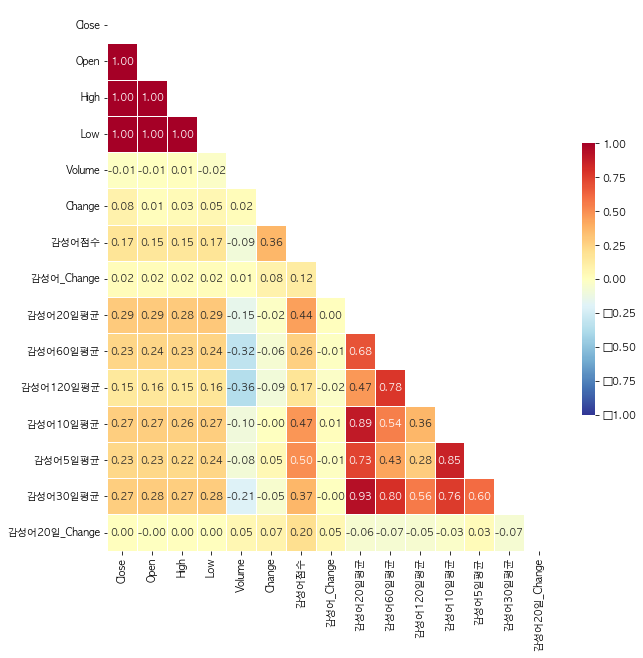

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
rc('font', family='AppleGothic')

# 그림 사이즈 지정
fig, ax=plt.subplots( figsize=(10,10) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df.corr(), 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1,   # 컬러바 범위 -1 ~ 1
            fmt = '.2f' # 소수점 2번째자리까지만 출력
           )  


In [15]:
df

Date    Close     Open     High      Low        Volume  Change  \
0    2017-01-02  2026.16  2022.23  2031.79  2015.68  2.298800e+08 -0.0001   
1    2017-01-03  2043.97  2034.31  2044.07  2028.47  2.681300e+08  0.0088   
2    2017-01-04  2045.64  2046.29  2046.29  2040.61  3.714900e+08  0.0008   
3    2017-01-05  2041.95  2045.52  2046.50  2039.49  5.413400e+08 -0.0018   
4    2017-01-06  2049.12  2048.11  2051.84  2045.66  4.553500e+08  0.0035   
..          ...      ...      ...      ...      ...           ...     ...   
976  2020-12-23  2759.82  2737.74  2769.08  2716.28  1.120000e+09  0.0096   
977  2020-12-24  2806.86  2762.60  2812.16  2762.60  1.030000e+09  0.0170   
978  2020-12-28  2808.60  2820.95  2834.59  2799.56  1.010000e+09  0.0006   
979  2020-12-29  2820.51  2810.55  2823.44  2792.06  1.050000e+09  0.0042   
980  2020-12-30  2873.47  2820.36  2878.21  2809.35  1.070000e+09  0.0188   

     감성어점수  감성어_Change  감성어20일평균    감성어60일평균   감성어120일평균  감성어10일평균  감성어5일평균  \
0    245.0         NaN       NaN         NaN         NaN       NaN      NaN   
1    372.0    0.518367       NaN         NaN         NaN       NaN      NaN   
2    425.0    0.142473       NaN         NaN         NaN       NaN      NaN   
3    344.0   -0.190588       NaN         NaN         NaN       NaN      NaN   
4    344.0    0.000000       NaN         NaN         NaN       NaN    277.2   
..     ...         ...       ...         ...         ...       ...      ...   
976  308.0    0.316239    327.75  296.066667  291.383333     290.6    229.0   
977  360.0    0.168831    332.15  298.133333  289.450000     288.6    230.2   
978  531.0    0.475000    336.30  298.183333  286.833333     291.3    247.8   
979  316.0   -0.404896    339.65  300.700000  285.633333     302.8    286.6   
980  328.0    0.037975    334.85  300.916667  282.791667     304.2    303.0   

       감성어30일평균  감성어20일_Change  
0           NaN            NaN  
1           NaN            NaN  
2           NaN            NaN  
3           NaN            NaN  
4           NaN            NaN  
..          ...            ...  
976  343.633333       0.400000  
977  343.900000       0.299639  
978  346.833333       0.144397  
979  347.600000      -0.233010  
980  342.633333      -0.207729  

[981 rows x 16 columns]

In [24]:
df날짜=df.copy()
plt.figure(figsize=(20,5))
sns.lineplot(x='Date', y='감성어20일평균', data=df날짜)

<AxesSubplot:xlabel='Date', ylabel='감성어20일평균'>

In [29]:
df비교=df.copy()
df비교.index=df비교['Date']
df비교=df비교[['Close','감성어20일평균']]

In [31]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df비교[:]=ss.fit_transform(df비교[:])
# df_장전_글로벌['글로벌_감성어표준화_장전'][:]=ss.fit_transform(df_장전_글로벌['글로벌_감성어점수_장전'][:])
df비교

Close  감성어20일평균
Date                          
2017-01-02 -1.064176       NaN
2017-01-03 -0.975624       NaN
2017-01-04 -0.967320       NaN
2017-01-05 -0.985667       NaN
2017-01-06 -0.950018       NaN
...              ...       ...
2020-12-23  2.583614 -0.421111
2020-12-24  2.817499 -0.382512
2020-12-28  2.826150 -0.346106
2020-12-29  2.885367 -0.316718
2020-12-30  3.148686 -0.358826

[981 rows x 2 columns]

In [33]:
df비교['Date']=df비교.index
df비교

Close  감성어20일평균        Date
Date                                      
2017-01-02 -1.064176       NaN  2017-01-02
2017-01-03 -0.975624       NaN  2017-01-03
2017-01-04 -0.967320       NaN  2017-01-04
2017-01-05 -0.985667       NaN  2017-01-05
2017-01-06 -0.950018       NaN  2017-01-06
...              ...       ...         ...
2020-12-23  2.583614 -0.421111  2020-12-23
2020-12-24  2.817499 -0.382512  2020-12-24
2020-12-28  2.826150 -0.346106  2020-12-28
2020-12-29  2.885367 -0.316718  2020-12-29
2020-12-30  3.148686 -0.358826  2020-12-30

[981 rows x 3 columns]

<AxesSubplot:xlabel='Date'>

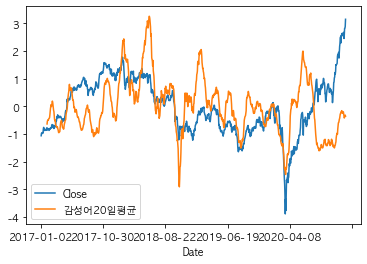

In [38]:
df비교.plot()

# 코스피 종가지수와 감성어 20일 평균선

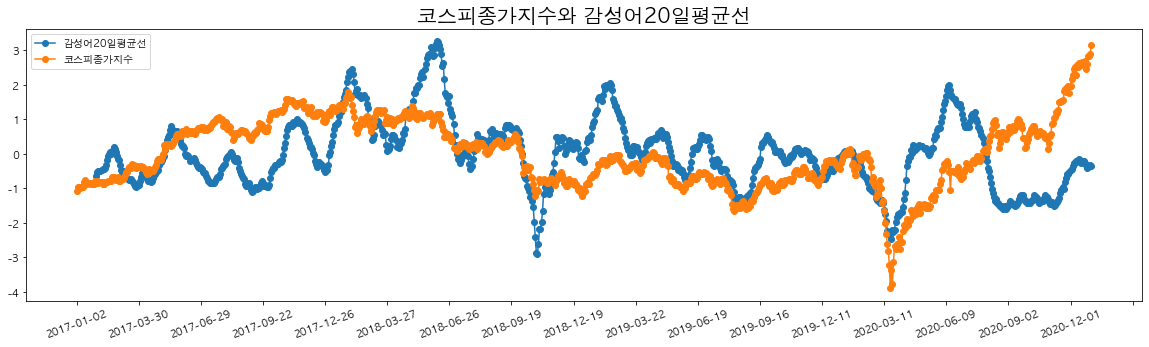

In [45]:
from matplotlib.ticker import MaxNLocator

plt.rcParams['axes.unicode_minus'] = False
fig=plt.figure(figsize=(20,5))
ax=fig.add_subplot()


ax.plot(df비교['Date'], df비교['감성어20일평균'], marker='o', label='감성어20일평균선')
ax.plot(df비교['Date'], df비교['Close'], marker='o', label='코스피종가지수')
ax.xaxis.set_major_locator(MaxNLocator(20))

ax.legend()

plt.title('코스피종가지수와 감성어20일평균선', fontsize=20)
plt.xticks(rotation=20)
plt.show()

# heatmap으로 상관관계를 표시

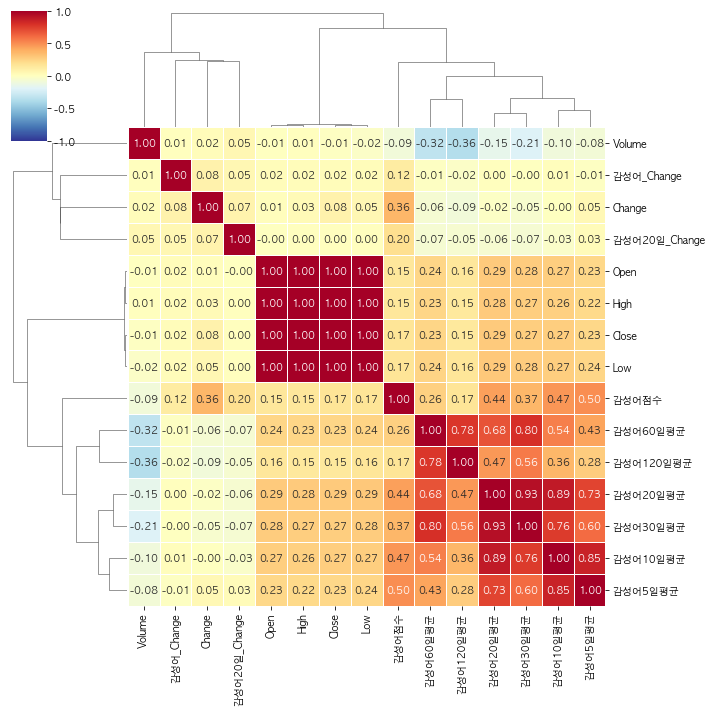

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

plt.rcParams["figure.figsize"] = (8,8)
sns.clustermap(df.corr(),
           linewidths=0.5,
           annot = True, #실제 값 화면에 나타내기
           cmap = 'RdYlBu_r', #색상
           vmin = -1, vmax=1 ,#컬러차트 영역 -1 ~ +1
           fmt = '.2f'
          )